In [2]:
import pandas as pd
import os 
import matplotlib as plt
import re
import nltk
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

os.chdir(r'C:\Users\stade\PycharmProjects\machine_learning')
print(os.getcwd())

C:\Users\stade\PycharmProjects\machine_learning


In [11]:
train_data = pd.read_csv('disaster_test(1).csv')
test_data = pd.read_csv('disaster_train) (2).csv')

## visualize and get more insight on data

In [22]:
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [23]:
train_data.shape

(7613, 5)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<AxesSubplot:>

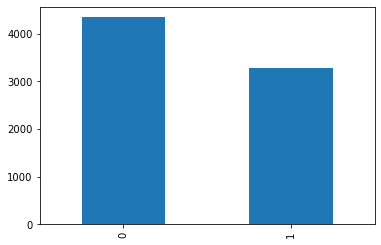

In [29]:
train_data['target'].value_counts().plot(kind= 'bar')


## droping / selecting required rows

In [12]:
train_intr = train_data[['target', 'text']]
train_intr.head(7)

,target,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' are ...
3,1,"13,000 people receive #wildfires evacuation or..."
4,1,Just got sent this photo from Ruby #Alaska as ...
5,1,#RockyFire Update => California Hwy. 20 closed...
6,1,#flood #disaster Heavy rain causes flash flood...


## cleaning text 

In [18]:
space_replace = re.compile('[/(){}\[\] #\|@,;] 0123456789')
bad_symbols = re.compile('[^0-9a-z # +_]')
stopwords = nltk.corpus.stopwords.words('english')
urls = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+' 'rt')

def text_cleaning(text):
    text = BeautifulSoup(text, "lxml").text #removing any html decoding
    text = text.lower() #removing capitalization
    text = space_replace.sub(' ', text)#replacing symbols with a space
    text = bad_symbols.sub('', text) #deleting symbols from the text
    text = ' '.join(word for word in text.split() if word not in stopwords) #removing stopwords
    text = urls.sub('', text)#removing urls
    return text

train_intr['cleanedtext']= train_intr['text'].apply(text_cleaning)
train_intr.head(3)

<ipython-input-18-bb496bec400d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_intr['cleanedtext']= train_intr['text'].apply(text_cleaning)


,target,text,cleanedtext
0,1,Our Deeds are the Reason of this #earthquake M...,deeds reason #earthquake may allah forgive us
1,1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,1,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...


## visualizing my test data

In [28]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [25]:
x= train_intr['cleanedtext']
y= train_intr['target']
x_test = test_data['text']

## creating model converting text to vectors and fiting

In [24]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB() )
model.fit(x,y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [26]:
model.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
def predict_cat(tweet, model= model):
    pred= model.predict([tweet])
    if pred==1:
        return 'Disaster'
    else:
        return 'Normal'

In [31]:
predict_cat('accident')

'Disaster'